# === Multinomal Logistic Regression Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
from sklearn import datasets

In [5]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris['feature_names'] #So, the only 2 features we are interested in is 'petal lenght' and 'petal width'

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Task 1: TrainTestSplit from scratch

In [9]:
shuffled_index = np.arange(0, len(X),1)
np.random.shuffle(shuffled_index)
shuffled_index

array([ 74,  66,  60,  58, 103,  49,  62,   9,  34,  17,  13, 105,  29,
        24,  77,  78, 127,   8, 137,  30,  89,  83, 124,  27, 126,  35,
       149, 140,  96, 101, 139,  40,  23,  45, 134,  33, 107,  43,  87,
       121, 114,   3,  82,  59,  95, 136,   7,   5,   4,  14,   6,  37,
         2,  52, 122, 130, 138, 148,  28,  86,  64, 113, 109,  99,  84,
        10,  90,  76,  69,  91,  54, 104,  55,  53, 133, 117,  92,  46,
        50,  25, 116,  18,  97, 146, 142, 111,  42, 143, 110,  38,  65,
        48, 115,  61,  80,  75,  70,   1,  39,  94,  26, 145,  47, 118,
       100,  72, 135,  21, 147,  31,  20,  98, 128,  71, 112,  36, 132,
       108,  68,  44,  63,  93,  79,  81,  67, 125,  16, 119,   0,  22,
       123, 131,  85, 120,  11,  88,  51,  41,  12,  32, 144,  56, 129,
       106,  57,  15,  73, 102, 141,  19])

Using training size of 70% and test size of 30%

In [10]:
stop_start_idx = int(0.7 * (len(shuffled_index)))

In [11]:
shuffled_index[0 :stop_start_idx ]

array([ 74,  66,  60,  58, 103,  49,  62,   9,  34,  17,  13, 105,  29,
        24,  77,  78, 127,   8, 137,  30,  89,  83, 124,  27, 126,  35,
       149, 140,  96, 101, 139,  40,  23,  45, 134,  33, 107,  43,  87,
       121, 114,   3,  82,  59,  95, 136,   7,   5,   4,  14,   6,  37,
         2,  52, 122, 130, 138, 148,  28,  86,  64, 113, 109,  99,  84,
        10,  90,  76,  69,  91,  54, 104,  55,  53, 133, 117,  92,  46,
        50,  25, 116,  18,  97, 146, 142, 111,  42, 143, 110,  38,  65,
        48, 115,  61,  80,  75,  70,   1,  39,  94,  26, 145,  47, 118,
       100])

In [12]:
X_train = X[shuffled_index[0 :stop_start_idx ]]
X_test  = X[shuffled_index[stop_start_idx :]]
y_train = y[shuffled_index[0 :stop_start_idx]]
y_test  = y[shuffled_index[stop_start_idx :]]

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


### Data Preprecessing: Scaling on numercial feautures 

In [14]:
X_train_mean = X_train.mean(axis= 0)
X_train_std  = X_train.std(axis = 0)
print(X_train_mean)
print(X_train_std)

[3.74285714 1.19047619]
[1.76629055 0.76749733]


In [15]:
scaled_X_train = (X_train - X_train_mean) / X_train_std
scaled_X_test = (X_test - X_train_mean) / X_train_std

### Data Preprecessing: Adding intercept variable

In [16]:
scaled_X_train = np.insert(scaled_X_train, 0 ,1, axis = 1)
scaled_X_test = np.insert(scaled_X_test, 0 ,1, axis = 1)

In [17]:
print(scaled_X_train.shape)
print(scaled_X_test.shape)

(105, 3)
(45, 3)


### Data Preprecessing: One Hot Encoding on categorical dependent variable

In [18]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [19]:
y_train

array([1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2])

In [20]:
Y_train_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

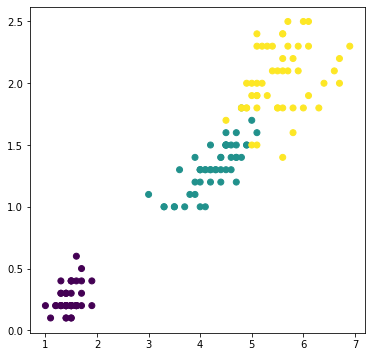

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Task 2: Create Multinomial Logistic Regression class

In [22]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### The 3 target classes of this models: ['setosa', 'versicolor', 'virginica']

In [23]:
print(scaled_X_train.shape) # m by n
print(Y_train_encoded.shape) # m by k (classes)

(105, 3)
(105, 3)


In [24]:
class LogisticRegression:
    
    def __init__(self, alpha = 0.0001, max_iter = 10000, method = 'batch'):
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.theta = 0
        self.count = 0
        self.loss_record = 0
        self.time = 0
        
        
    def plot_graph(self):
        plt.plot(np.arange(self.count), self.loss_record[2:])
        plt.xlabel('iterations')
        plt.ylabel('loss')
        plt.title(f'Multinomial Logistic Regression using: {self.method} method')
        
    def fit(self, X_train, y_train):
        self.threshold = 0.0001
        
        if self.method == 'batch':
            start_time = time.time()
            theta = np.zeros((X_train.shape[1] , y_train.shape[1]))
            loss_record = [100,10]
            count =0

            while (np.abs(loss_record[-1] - loss_record[-2]) > self.threshold) and (count < self.max_iter):
                output = np.dot(X_train, theta)
                softmax = np.exp(output) / np.sum(np.exp(output), axis = 1, keepdims = True)
                error = softmax - y_train
                loss =  -np.sum(y_train * np.log(softmax)) / len(X_train)
                loss_record.append(loss)
                gradient = np.dot(X_train.T, error)
                theta = theta - (self.alpha * gradient)
                count += 1

                if count % 500 ==0:
                    print(f"{count}: {loss}")

            
            time_taken = time.time() - start_time
            print(f"time_taken: {time_taken}")
            
            self.time = time_taken
            self.loss_record = loss_record
            self.count = count
            self.theta = theta  
        
        
        elif self.method == 'stochastic':
            self.alpha = 0.001
            start_time = time.time()
            self.threshold = 0.000001
            theta = np.zeros((X_train.shape[1] , y_train.shape[1]))
            loss_record = [100,10]
            count =0
            all_index = np.arange(len(X_train))
            
            while (np.abs(loss_record[-1] - loss_record[-2]) > self.threshold) and (count < self.max_iter):
                if len(all_index) > 0:
                    random_index = np.random.choice(all_index)     
                    selected_X_train = X_train[random_index, :].reshape(1,-1) # MUST RESHAPE to make it have m = 1
                    selected_y_train = y_train[random_index]   



                    output = np.dot(selected_X_train, theta)
                    softmax = np.exp(output) / np.sum(np.exp(output), axis = 1, keepdims= True) # doesn't have to specify axis =1
                    error = softmax - selected_y_train
                    loss =  -np.sum(selected_y_train * np.log(softmax))
                    loss_record.append(loss)
                    gradient = np.dot(selected_X_train.T, error)
                    theta = theta - (self.alpha * gradient)
                    count += 1

                    if count % 500 ==0:
                        print(f"{count}: {loss}")
                    
                        
                else:
                    all_index = np.arange(len(X_train))
                    
            
            time_taken = time.time() - start_time
            print(f"time_taken: {time_taken}")
            self.time = time_taken
            self.loss_record = loss_record
            self.count = count
            self.theta = theta
            
            
        elif self.method == 'minibatch':
            start_time = time.time()
            self.threshold = 0.000001
            
            theta = np.zeros((X_train.shape[1] , y_train.shape[1]))
            loss_record = [100,10]
            count =0
            all_index = np.arange(len(X_train))
            batch_size = int(0.1 * (len(X_train)))
            
            while (np.abs(loss_record[-1] - loss_record[-2]) > self.threshold) and (count < self.max_iter):
                if len(all_index) > 0:
                    random_index = np.random.choice(all_index)     
                    selected_X_train = X_train[random_index: random_index + batch_size]
                    selected_y_train = y_train[random_index: random_index + batch_size]   



                    output = np.dot(selected_X_train, theta)
                    softmax = np.exp(output) / np.sum(np.exp(output), axis = 1, keepdims = True)
                    error = softmax - selected_y_train
                    loss =  -np.sum(selected_y_train * np.log(softmax)) / len(X_train)
                    loss_record.append(loss)
                    gradient = np.dot(selected_X_train.T, error)
                    theta = theta - (self.alpha * gradient)
                    count += 1

                    if count % 500 ==0:
                        print(f"{count}: {loss}")
                    
                        
                else:
                    all_index = np.arange(len(X_train))
            
            time_taken = time.time() - start_time
            print(f"time_taken: {time_taken}")
            self.time = time_taken
            self.loss_record = loss_record
            self.count = count
            self.theta = theta
            
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "stochastic".')
    
    
    def predict(self, X_test):
        output = np.dot(X_test, self.theta)
        softmax = np.exp(output) / np.sum(np.exp(output), axis = 1, keepdims = True)
        return np.argmax(softmax, axis = 1)

---

## Task 3 & 4 : Perform 3 types of gradient descent methods, calculate time and plot loss function against iterations

In [25]:
batch_model = LogisticRegression(method = 'batch')
batch_model.fit(scaled_X_train, Y_train_encoded)

500: 0.46373672739808314
1000: 0.3648246717446497
time_taken: 0.10597372055053711


In [26]:
batch_model.fit(scaled_X_train, Y_train_encoded)

500: 0.46373672739808314
1000: 0.3648246717446497
time_taken: 0.10986089706420898


In [66]:
minibatch_model = LogisticRegression(method = 'minibatch')
minibatch_model.fit(scaled_X_train, Y_train_encoded)

500: 0.08260614679172601
1000: 0.07661102888238958
1500: 0.05445162493375364
2000: 0.06590267380796959
2500: 0.06511911871753262
3000: 0.06400870194957281
3500: 0.006662456446432569
4000: 0.07234366665931224
4500: 0.0661812749744973
5000: 0.053087624040386645
5500: 0.06967057381454154
6000: 0.0334953994929278
6500: 0.04451002618021134
7000: 0.04292893260000279
7500: 0.04144210606153707
8000: 0.0462458450900513
8500: 0.03424388039498845
time_taken: 0.6623153686523438


In [64]:
minibatch_model.count

336

In [67]:
stochastic_model = LogisticRegression(method = 'stochastic')
stochastic_model.fit(scaled_X_train, Y_train_encoded)

500: 0.7128616519645731
1000: 0.45384867314496274
1500: 0.6318718684549842
2000: 1.0660256857529036
2500: 0.22842529189743288
3000: 0.25930971465444363
3500: 0.500926143349905
4000: 0.9152890906686668
4500: 0.9120921523948607
5000: 0.09167926369167788
5500: 0.2162848685404679
6000: 0.16114700152972758
6500: 0.7833192221533628
7000: 0.4944566389938612
7500: 0.10263673250232334
8000: 0.09331562903577134
8500: 0.9090849586366916
9000: 0.09948672194265744
9500: 0.07723919303704041
10000: 0.08734486384782356
time_taken: 0.8606281280517578


Text(0.5, 1.0, 'stochastic model, \nrunning 10000 iterations,  wihtin 0.86063 second')

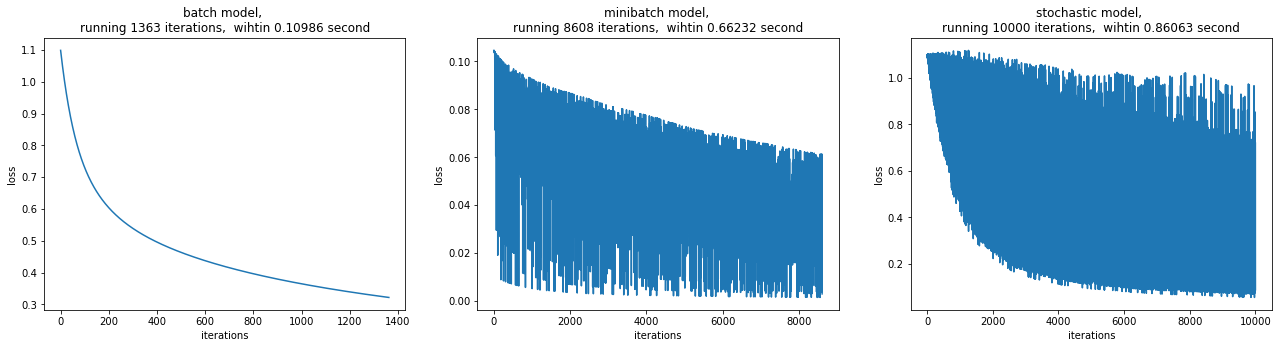

In [68]:
fig, axes = plt.subplots(1,3, figsize = (22,5))

axes[0].plot(np.arange(batch_model.count) , batch_model.loss_record[2:])
axes[0].set_xlabel("iterations")
axes[0].set_ylabel("loss")
axes[0].set_title(f"{batch_model.method} model, \nrunning {batch_model.count} iterations,  wihtin {round(batch_model.time,5)} second")

axes[1].plot(np.arange(minibatch_model.count) , minibatch_model.loss_record[2:])
axes[1].set_xlabel("iterations")
axes[1].set_ylabel("loss")
axes[1].set_title(f"{minibatch_model.method} model, \nrunning {minibatch_model.count} iterations,  wihtin {round(minibatch_model.time,5)} second")

axes[2].plot(np.arange(stochastic_model.count) , stochastic_model.loss_record[2:])
axes[2].set_xlabel("iterations")
axes[2].set_ylabel("loss")
axes[2].set_title(f"{stochastic_model.method} model, \nrunning {stochastic_model.count} iterations,  wihtin {round(stochastic_model.time,5)} second")

### Observations

- The loss in batch model drastically drops within hundreds of iterations, and reaches the point where the loss delta is smaller than the theshold, making the model to stop at after 1,363 iteration, using only 0.109 seconds
- The loss in minibatch model shows a linearly decrease as iteration goes up. However, we can see the higher degree of fluctuation as it uses only 10% of the entire data set to compute.
- The loss in stochastic  model portrays the highly fluctuating loss, resulting from using only one point of data to compute the loss. The model keeps iterating until reaches the maximum iteration without having difference of previous loss and current loss smaller than threshold. As the model has the highest number of iterations, it is computed with the most amount of time at ~ 0.8 seconds
- Normally, the batch model should take the highest amount of time because it takes the entire dataset to compute, while minibatch method takes a portion of the dataset like ~ 10% and stochastic takes only 1 number of sample
- But in my examples, I set the model to stop when loss delta is less than threshold. Batch method, as a result of computing the entire dataset, reaches that loss delta faster within only 1,363 iterations, making me use less time compared to other methods

### The model raises 'ValueError' when the method specified for the model is not either 'batch', 'minibatch', or 'stochastic

In [32]:
some_other_model = LogisticRegression(method = 'other')

In [33]:
some_other_model.fit(scaled_X_train, Y_train_encoded)

ValueError: Method must be one of the followings: "batch", "minibatch" or "stochastic".

---

## Task5: Perform a classification using 3 different traning methods and use Sklearn to evaluate the model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
print(classification_report(batch_model.predict(scaled_X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      1.00      0.96        32
           2       1.00      0.92      0.96        37

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [70]:
print(classification_report(minibatch_model.predict(scaled_X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.74      1.00      0.85        26
           2       1.00      0.79      0.88        43

    accuracy                           0.91       105
   macro avg       0.91      0.93      0.91       105
weighted avg       0.94      0.91      0.92       105



In [71]:
print(classification_report(stochastic_model.predict(scaled_X_train), y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      1.00      0.94        31
           2       1.00      0.89      0.94        38

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105



In [43]:
print(accuracy_score(stochastic_model.predict(scaled_X_train), y_train))

0.9523809523809523


### Accuracy Score on Training set
- Batch Method ~ 97%
- Minibatch Method ~ 91%
- Stochastic Method ~ 96%

In [72]:
batch_yhat = batch_model.predict(scaled_X_test)
minibatch_yhat = minibatch_model.predict(scaled_X_test)
stochastic_yhat = stochastic_model.predict(scaled_X_test)

In [73]:
y_test

array([1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 2,
       0])

In [74]:
print('==================BATCH METHOD==================')
print()
print(classification_report(batch_yhat, y_test))

==================BATCH METHOD==================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [75]:
print('==================MINIBATCH METHOD==================')
print()
print(classification_report(minibatch_yhat, y_test))

==================MINIBATCH METHOD==================

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.47      1.00      0.64         7
           2       1.00      0.76      0.86        21

    accuracy                           0.82        45
   macro avg       0.82      0.86      0.80        45
weighted avg       0.92      0.82      0.84        45



In [76]:
print('==================STOCHASTIC METHOD==================')
print()
print(classification_report(stochastic_yhat, y_test))

==================STOCHASTIC METHOD==================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      1.00      0.89        12
           2       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.93        45
weighted avg       0.95      0.93      0.93        45



Text(0.5, 24.0, 'predicted label')

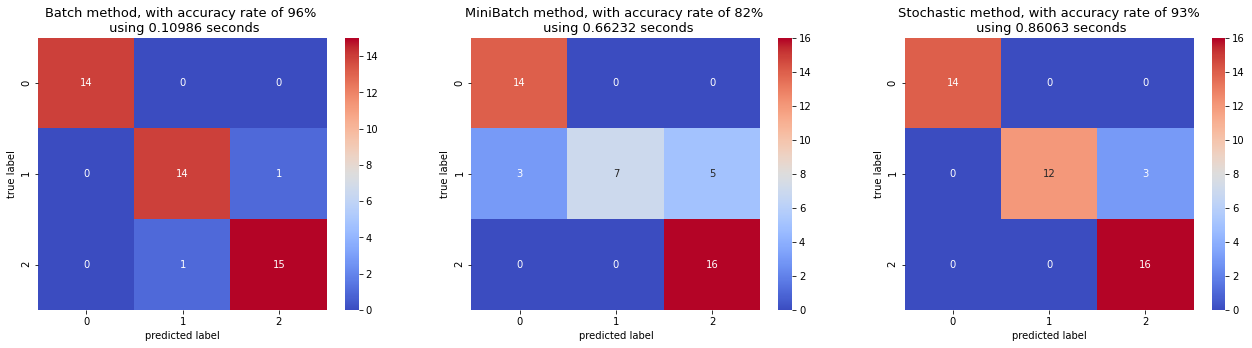

In [80]:
fig, axes = plt.subplots(1,3, figsize = (22,5))


sns.heatmap(confusion_matrix(y_true = y_test, y_pred = batch_yhat), annot=True, cmap= 'coolwarm', ax = axes[0])
axes[0].set_title(f'Batch method, with accuracy rate of 96% \n using {round(batch_model.time,5)} seconds',fontsize = 13)
axes[0].set_ylabel('true label')
axes[0].set_xlabel('predicted label')


sns.heatmap(confusion_matrix(y_true = y_test, y_pred = minibatch_yhat), annot=True, cmap= 'coolwarm', ax = axes[1])
axes[1].set_title(f'MiniBatch method, with accuracy rate of 82% \n using {round(minibatch_model.time,5)} seconds',fontsize = 13)
axes[1].set_ylabel('true label')
axes[1].set_xlabel('predicted label')


sns.heatmap(confusion_matrix(y_true = y_test, y_pred = stochastic_yhat), annot=True, cmap= 'coolwarm', ax = axes[2])
axes[2].set_title(f'Stochastic method, with accuracy rate of 93%\n using {round(stochastic_model.time,5)} seconds',fontsize = 13)
axes[2].set_ylabel('true label')
axes[2].set_xlabel('predicted label')


---

## Task 6: Discuss the result ie. time taken and loss

- Considering both time taken and accuracy score, the model using batch gradient descent is the best one. As it consumes only 0.109 seconds but can yield the accuracy as high as 96%
- Between the minibatch and stochastic methods, stochastic is preferred as it is slightly faster and yields the accuracy score around 11% higher than the miniBatch
- It is important to note that in general, the batch method usually takes more time to compute as it has to utilize the entire dataset per each calculation epoch. But on this exercise, I have set the model to early stop, in which the batch method takes far fewer times (only around ~1400 iterations) compared to ~8,600 for minibatch and 10,000 for stochastic